In [1]:
import numpy as np
import pandas as pd

In [9]:
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5]
Delay = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']

data = pd.DataFrame({'풍속': Wind, '지연여부': Delay})

def binary_tree(data, threshold):
    yes = []
    no = []
    
    for wind in data['풍속']:
        if wind > threshold:
            yes.append(wind)
        else:
            no.append(wind)
            
    data_yes = pd.DataFrame({'풍속': yes, '여상 지연 여부': ['Yes']*len(yes)})
    data_no = pd.DataFrame({'풍속': no, '여상 지연 여부': ['No']*len(no)})
    
    return data_no.append(data_yes, ignore_index=True)

data_pred = binary_tree(data, threshold = 1)
data_pred

,풍속,여상 지연 여부
0,1.0,No
1,1.5,Yes
2,2.5,Yes
3,5.0,Yes
4,5.5,Yes
5,6.5,Yes


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

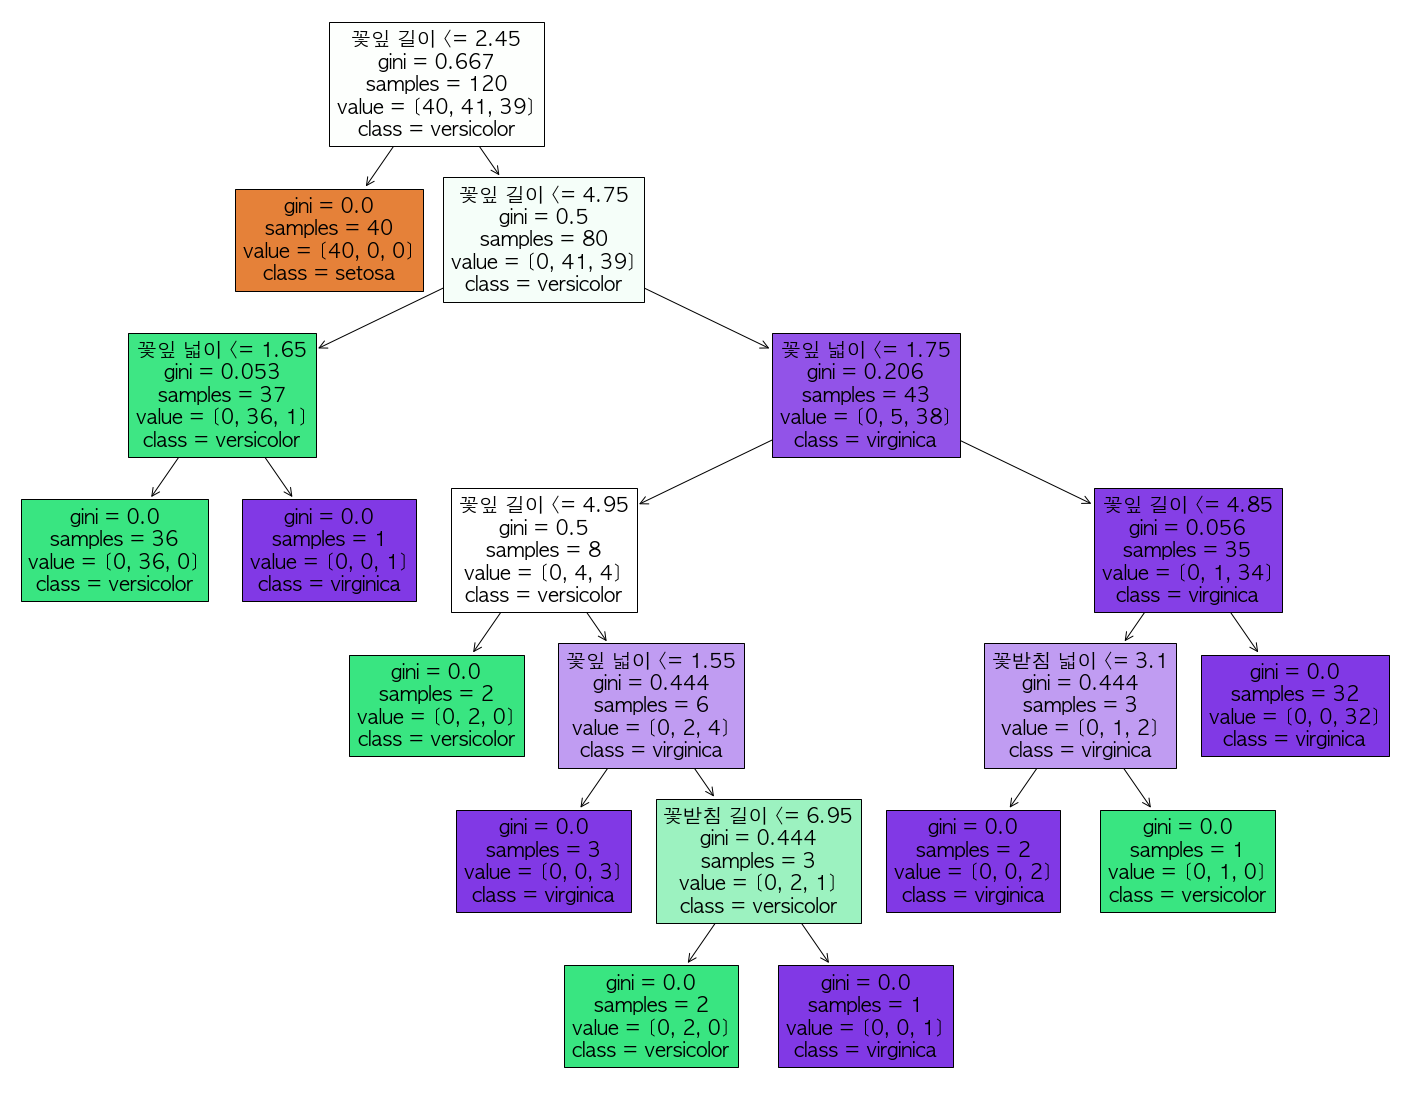

In [24]:
X, y = load_iris(return_X_y=True)
df = pd.DataFrame(X, columns=['꽃받침 길이', '꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'])
df['클래스'] = y

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_y)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(DTmodel,
                   feature_names=['꽃받침 길이', '꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'],
                   class_names=['setosa', 'versicolor', 'virginica'], filled=True)

In [25]:
### 간단한 이진트리 분류기 만들기
import numpy as np
import pandas as pd

# 직업, 키, 성별로 이름을 구분하는 간단한 이진트리 분류기를 만들어 보자
name = ['하하','김범수','다현','아이유','최민식','김혜수']
job =  [ '가수', '가수','가수', '가수','배우','배우']
height = [171, 182, 158, 160, 177,170]
sex = ['M','M','F','F','M','F']

# Node 번호를 지정해주기 위한 변수
num = 0

# Node 정보를 저장하기 위한 딕셔너리 생성
node_list = {}

# 데이터 프레임 만들기
data = pd.DataFrame({'이름':name, '직업':job, '키':height, '성별':sex})
#display(data)

"""
1. 성별에 따라 사람을 분류하는 함수를 구현하자.
"""
def Sex_Node(df, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    
    # Node num, Depth, Node Name 출력
    num += 1
    print('Node_num : {} | Node Depth : {} | Sex_Node'.format(num, depth))
    node_list[num] = 'Sex_Node'
    
    male = [ ]
    female = []
    #처음 성별 데이터 전체로 분류
    for idx, sex in enumerate(df['성별']):
        # 남자인 경우 Index 저장
        if sex == 'M':
            male.append(idx)
        elif sex == 'F':
            female.append(idx)
        
    # Index 확인
    print('남자 Index : ', male)
    print('여자 Index : ', female)
    
    # 성별 분류 후 직업을 분류하는 Node를 호출합니다.
    Job_Node(df, male, depth+1)
    Job_Node(df, female, depth+1)

"""
2. 직업에 따라 사람을 분류하는 함수를 구현하자.
"""
def Job_Node(df,idx, depth):
    #display(df)
    global num
    global node_list
    num += 1
    
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Job_Node'.format(num, depth))
    node_list[num] = 'Job_Node'
    
    #Index 저장을 위한 리스트
    singer = []
    
    for i in idx:
        # 가수인 경우 Index 저장
        if df['직업'][i] == '가수':
            singer.append(i)
        # 배우인 경우 Node 번호와 해당 배우의 이름 출력
        else:
            num += 1
            print('Node_num: {} | Node Depth : {} | Name : {}'.format(num, depth+1, data['이름'][i]))
            node_list[num] = data['이름'][i]
            
    # 가수인 경우 분류가 끝나지 않았으므로 Index 출력
    print('가수 Index: ', singer)
    
    #마지막 분류 기준인 키를 통해 가수를 분류
    Height_Node(df,singer, depth+1)
            
"""
3. 키에 따라 사람을 분류하는 함수 구현
"""    
def Height_Node(df, idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    num += 1
    
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth: {} | Height_Node'.format(num,depth))
    node_list[num] = 'Height_Node'
    
    for i in idx:
        num += 1
        # 성별에 따라 키의 기준이 다르기 때문에 성별로 우선 분류
        if df['성별'][i] == 'M':
            # 남자의 경우 키에 따라 분류
            # 키가 180보다 작은 경우
            if df['키'][i]<180:
                print('Node_num: {} | Node Depth : {} | Name : {}'.format(num, depth+1, data['이름'][i]))
                node_list[num] = data['이름'][i]
            #키가 180보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1, data['이름'][i]))
                node_list[num] = data['이름'][i]
        else:
            # 여자의 경우 키에 따라 분류
            # 키가 160보다 작은 경우
            if df['키'][i] <160:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
            # 키가 160보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
    
def main():
    # 첫 번째 분류 기준으로 성별을 설정하자.
    Sex_Node(data, 1)

if __name__ == '__main__':
    main()

Node_num : 1 | Node Depth : 1 | Sex_Node
남자 Index :  [0, 1, 4]
여자 Index :  [2, 3, 5]
Node_num : 2 | Node Depth : 2 | Job_Node
Node_num: 3 | Node Depth : 3 | Name : 최민식
가수 Index:  [0, 1]
Node_num : 4 | Node Depth: 3 | Height_Node
Node_num: 5 | Node Depth : 4 | Name : 하하
Node_num : 6 | Node Depth : 4 | Name : 김범수
Node_num : 7 | Node Depth : 2 | Job_Node
Node_num: 8 | Node Depth : 3 | Name : 김혜수
가수 Index:  [2, 3]
Node_num : 9 | Node Depth: 3 | Height_Node
Node_num : 10 | Node Depth : 4 | Name : 다현
Node_num : 11 | Node Depth : 4 | Name : 아이유


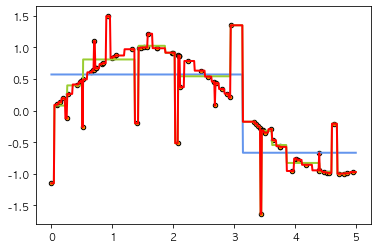

In [40]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

def load_data():
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80,1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))
    
    return X, y
    
def DT_reg(X, y, X_test, m_depth):
    reg = DecisionTreeRegressor(max_depth=m_depth)
    reg.fit(X, y)
    pred = reg.predict(X_test)
    
    return pred
def Visualize(X, y, X_test, y_1, y_5, y_20):
    plt.figure()
    plt.scatter(X, y, s=20, edgecolor='black', c='darkorange', label='data')
    plt.plot(X_test, y_1, color='cornflowerblue', label='max_depth=1', linewidth=2)
    plt.plot(X_test, y_5, color='yellowgreen', label='max_depth=1', linewidth=2)
    plt.plot(X_test, y_20, color='red', label='max_depth=1', linewidth=2)
    
def main():
    X, y = load_data()
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    
    y_1 = DT_reg(X, y, X_test, 1)
    y_5 = DT_reg(X, y, X_test, 5)
    y_20 = DT_reg(X, y, X_test, 20)
    Visualize(X, y, X_test, y_1, y_5, y_20)
    
if __name__ == '__main__':
    main()

In [43]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
def load_data():
    X, y = load_breast_cancer(return_X_y=True)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=156)
    
    return train_X, test_X, train_y, test_y

def Voting_Clf(train_X, test_X, train_y, test_y):
    lr_clf = LogisticRegression()
    knn_clf = KNeighborsClassifier()

    vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')
    vo_clf.fit(train_X, train_y)
    pred = vo_clf.predict(test_X)
    
    return lr_clf, knn_clf, vo_clf, pred

def main():
    train_X, test_X, train_y, test_y = load_data()
    lr_clf, knn_clf, vo_clf, pred = Voting_Clf(train_X, test_X, train_y, test_y)
    
    print('> Voting Classifier 정확도: {0:.4f}\n'.format(accuracy_score(test_y, pred)))
    classifiers = [lr_clf, knn_clf]
    for classifier in classifiers:
        classifier.fit(train_X, train_y)
        pred = classifier.predict(test_X)
        class_name = classifier.__class__.__name__
        print('> {0} 정확도: {1:.4f}\n'.format(class_name, accuracy_score(test_y,pred)))
    
if __name__ == '__main__':
    main()

> Voting Classifier 정확도: 0.9474

> LogisticRegression 정확도: 0.9386

> KNeighborsClassifier 정확도: 0.9035



In [52]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
def load_data():
    X, y = load_breast_cancer(return_X_y=True)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=156)
    
    return train_X, test_X, train_y, test_y

def Bagging_Clf(train_X, test_X, train_y, test_y):
    ba_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100)
    ba_clf.fit(train_X, train_y)
    pred = ba_clf.predict(test_X)
    return ba_clf, pred

def main():
    train_X, test_X, train_y, test_y = load_data()
    ba_clf, pred = Bagging_Clf(train_X, test_X, train_y, test_y)
    print('> Bagging Classifier 정확도: {0:.4f}\n'.format(accuracy_score(test_y, pred)))
    
    single_dt = DecisionTreeClassifier()
    single_dt.fit(train_X, train_y)
    single_pred = single_dt.predict(test_X)
    print('> Single Decision Tree Classifier 정확도: {0:.4f}\n'.format(accuracy_score(test_y, single_pred)))
    
if __name__ == '__main__':
    main()

> Bagging Classifier 정확도: 0.9649

> Single Decision Tree Classifier 정확도: 0.9386



In [60]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
def load_data():
    X, y = load_breast_cancer(return_X_y=True)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=156)
    
    return train_X, test_X, train_y, test_y

def Random_clf(train_X, train_y, test_X):
    rfc = RandomForestClassifier()
    rfc.fit(train_X, train_y)
    pred = rfc.predict(test_X)
    
    return rfc, pred

def main():
    train_X, test_X, train_y, test_y = load_data()
    rfc, pred = Random_clf(train_X, train_y, test_X)
    
    print('테스트 데이터 예측 정확도: {0:.4f}'.format(accuracy_score(test_y, pred)))
    
if __name__ == '__main__':
    main()    

테스트 데이터 예측 정확도: 0.9561
